In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

In [3]:
timesData = pd.read_csv("timesData.csv")

In [4]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [5]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [6]:
df = timesData.iloc[:100,:]
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.research,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color= "rgba(16, 112, 2, 0.8)"),
                    text =  df.university_name)

trace2 = go.Scatter(
    x = df.world_rank,
    y = df.teaching,
    mode = "lines+markers",
    name = "teaching",
    marker = dict(color= "rgba(80, 26, 80, 0.8)"),
    text = df.university_name)
data =  [trace1,trace2]
layout = dict(title = "Citation and Teaching vs world rank of top 100 universities",
              xaxis = dict(title="World Rank",ticklen=5,zeroline=False)
             )
fig = dict(data = data, layout=layout)
iplot(fig)

In [7]:
df = timesData.iloc[:100,:]
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color= "rgba(18, 112, 2, 0.8)"),
                    text =  df.university_name)

trace2 = go.Scatter(
    x = df.world_rank,
    y = df.teaching,
    mode = "lines+markers",
    name = "teaching",
    marker = dict(color= "rgba(80, 26, 80, 0.8)"),
    text = df.university_name)
data =  [trace1,trace2]
layout = dict(title = "Citation and Teaching vs world rank of top 100 universities",
              xaxis = dict(title="World Rank",ticklen=5,zeroline=False)
             )
fig = dict(data = data, layout=layout)
iplot(fig)

In [8]:
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

trace1 = go.Scatter(
    x = df2014.world_rank,
    y = df2014.citations,
    mode = "markers",
    name = "2014",
    marker = dict(color = "rgba(255, 128, 255, 0.8)"),
    text = df2014.university_name)
trace2 = go.Scatter(
    x = df2015.world_rank,
    y = df2015.citations,
    mode = "markers",
    name = "2015",
    marker = dict(color = "rgba(255, 128, 2, 0.8)"),
    text = df2015.university_name)
trace3 = go.Scatter(
    x = df2016.world_rank,
    y = df2016.citations,
    mode = "markers",
    marker = dict(color = "rgba(0, 255, 200, 0.8)"),
    text = df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [9]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2016.university_name,
                y = df2016.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2016.country)
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2016.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [10]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [11]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name
# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .1,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

In [12]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2016.university_name    
    }
]
iplot(data)

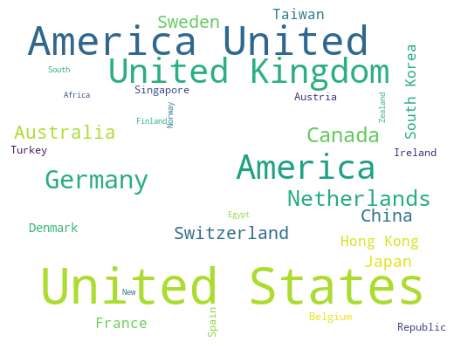

In [14]:
x2011 =  timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud =  WordCloud(
    background_color = "white",
    width=512,
    height=384,).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png")
plt.show()

In [13]:
x2015 = timesData[timesData.year == 2015]
trace0 = go.Box(
    y = x2015.total_score,
    name= "Total University Score",
    marker = dict(
        color="rgba(12, 12, 140)"),

)
trace1 = go.Box(
    y = x2015.research,
    name = "Top100 university research rank",
    marker = dict(
        color="rgba(12, 128, 128)")

)
data = [trace0,trace1]
iplot(data)

In [16]:
import plotly.figure_factory as ff
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international","total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
fig = ff.create_scatterplotmatrix(data2015, diag = "box", index = "index", colormap = "Portland",
                                 colormap_type="cat",
                                 height=700, width= 700)
iplot(fig)

In [17]:
data2015

,research,international,total_score,index
1402,98.1,67.0,94.3,1
1403,98.6,67.6,93.3,2
1404,97.7,90.7,93.2,3
1405,96.7,69.0,92.9,4
1406,95.6,87.8,92.0,5
...,...,...,...,...
1798,16.3,43.1,-,397
1799,27.5,36.0,-,398
1800,22.4,50.1,-,399
1801,17.4,33.1,-,400


In [18]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [19]:
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode="markers",
    marker=dict(
        size=10,
        color="cornflowerblue"
        
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [20]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)